# Exercises I - Required
Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wrangle_telco import get_telco_data
from wrangle_telco import prep_telco_data
from wrangle_telco import clean_telco_data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables 
# with other independent variables or independent variables with your target variable.
df = get_telco_data()

Reading from csv file...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
train, validate, test = prep_telco_data(df)

In [5]:
train.shape, validate.shape, test.shape

((3937, 47), (1688, 47), (1407, 47))

In [6]:
train.describe()


,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No_internet_service,streaming_movies_Yes,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,2316.775641,0.498095,0.485141,0.302769,0.905258,0.590297,0.265685,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,2284.984394,0.500060,0.499843,0.459514,0.292896,0.491841,0.441753,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,396.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,1414.800000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,3893.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.650000,8594.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [9]:
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']
df['total_charges'] = df.total_charges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   senior_citizen         7032 non-null   int64  
 2   partner                7032 non-null   object 
 3   dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   phone_service          7032 non-null   object 
 6   multiple_lines         7032 non-null   object 
 7   online_security        7032 non-null   object 
 8   online_backup          7032 non-null   object 
 9   device_protection      7032 non-null   object 
 10  tech_support           7032 non-null   object 
 11  streaming_tv           7032 non-null   object 
 12  streaming_movies       7032 non-null   object 
 13  paperless_billing      7032 non-null   object 
 14  monthly_charges        7032 non-null   float64
 15  tota

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair


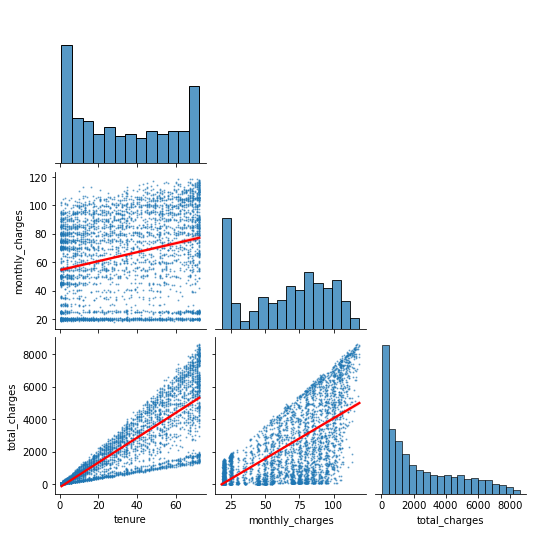

In [10]:
df_cols = ['tenure', 'monthly_charges', 'total_charges']
sns.pairplot(train[df_cols] , corner=True ,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s': 1, 'alpha': 0.5}}) 

In [11]:
# Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair

def plot_variable_pairs(df, columns, hue=None):
    sns.pairplot(df[columns], hue=hue, corner=True, kind= 'reg', plot_kws = {'line_kws':{'color':'red'},'scatter_kws':{'s': 1, 'alpha': 0.5}})
    plt.show()

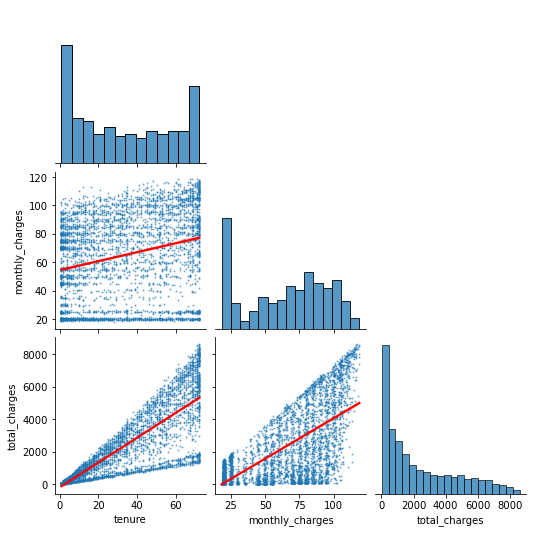

In [12]:
plot_variable_pairs(train, df_cols)

In [13]:
# Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.
def months_to_years(df):
    df['tenure_years'] = round(df.tenure // 12)
    df['tenure_years'] = df.tenure_years.astype('int')
    return df

In [14]:
months_to_years(df)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,tenure_years
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,Yes,No,Yes,65.60,593.30,No,DSL,One year,Mailed check,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,No,Yes,No,59.90,542.40,No,DSL,Month-to-month,Mailed check,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,Yes,No,Yes,83.90,267.40,Yes,Fiber optic,Month-to-month,Mailed check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,...,No,No,No,55.15,742.90,No,DSL,One year,Mailed check,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,...,No,Yes,Yes,85.10,1873.70,Yes,Fiber optic,Month-to-month,Electronic check,1
7040,Male,0,No,No,2,Yes,No,No,Yes,No,...,No,No,Yes,50.30,92.75,No,DSL,Month-to-month,Mailed check,0
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check,5


In [15]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,tenure_years
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check,0


In [16]:
# Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features 
# and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
def plot_categorical_and_continuous_vars(df, cat_cols, con_cols):

    for con in con_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize = (14, 4))
            fig.suptitle(f'{con} v. {cat}')

            plt.subplot(1, 3, 1)
            sns.boxplot(data = df, x = cat, y = con)
            plt.axhline(df[con].mean())

            plt.subplot(1, 3, 2)
            sns.lineplot(data = df, x = cat, y = con)
            plt.axhline(df[con].mean())

            plt.subplot(1, 3, 3)
            sns.histplot(data = df, x = con, bins = 10, hue = cat)
            plt.show()

In [17]:
con_cols = ['tenure', 'monthly_charges']
cat_cols = ['gender', 'internet_service_type']

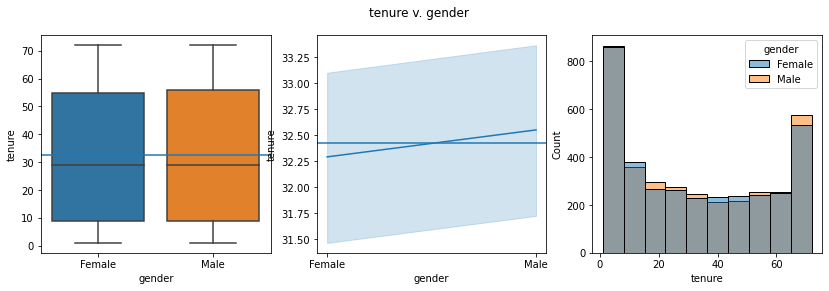

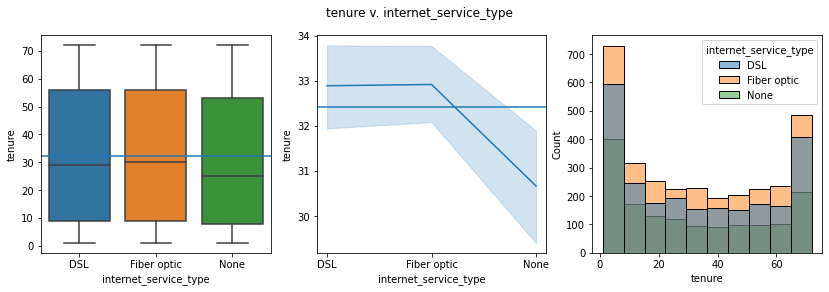

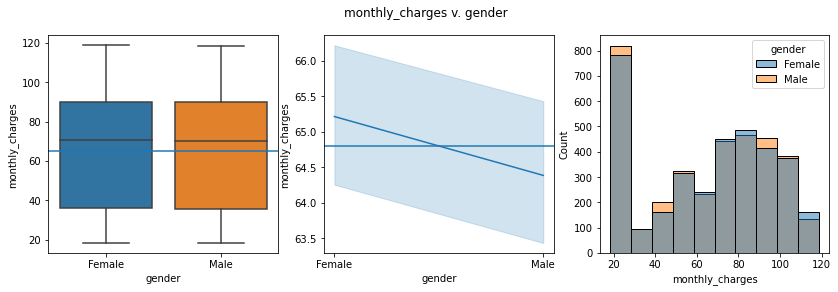

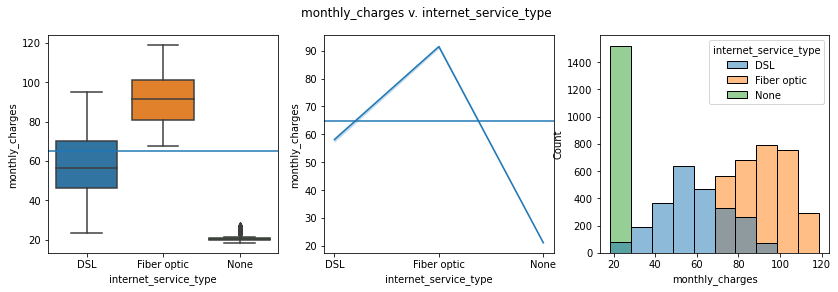

In [18]:
plot_categorical_and_continuous_vars(df, cat_cols, con_cols)

In [19]:
# Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.


<AxesSubplot:xlabel='internet_service_type', ylabel='monthly_charges'>

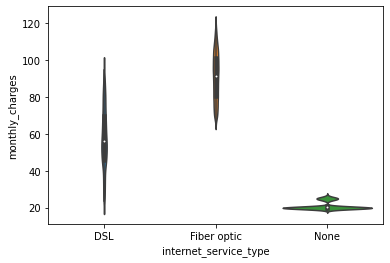

In [20]:
# Explore your dataset with any other visualizations you think will be helpful.
sns.violinplot(x = 'internet_service_type', y='monthly_charges', data = df)

In [21]:
# In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. 
# You will need to write a sql query to acquire your data. Make spending_score your target variable.
from env import get_db_url

df = pd.read_sql('SELECT * FROM customers', get_db_url('mall_customers'))
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df = df.drop(columns=['customer_id'])

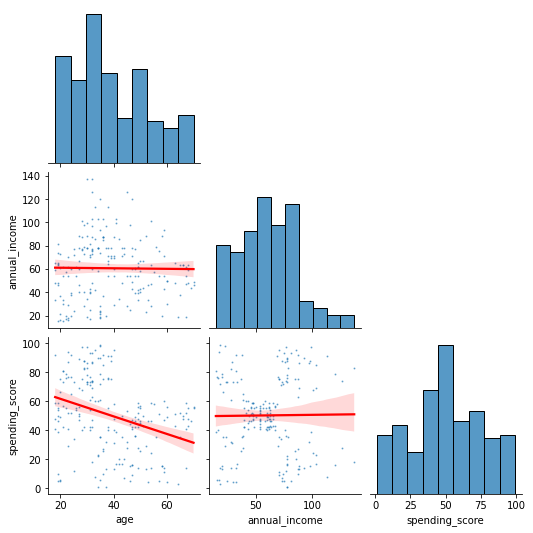

In [23]:
plot_variable_pairs(df, df.columns)

In [24]:
con_cols = ['annual_income', 'age', 'spending_score']
cat_cols = ['gender']

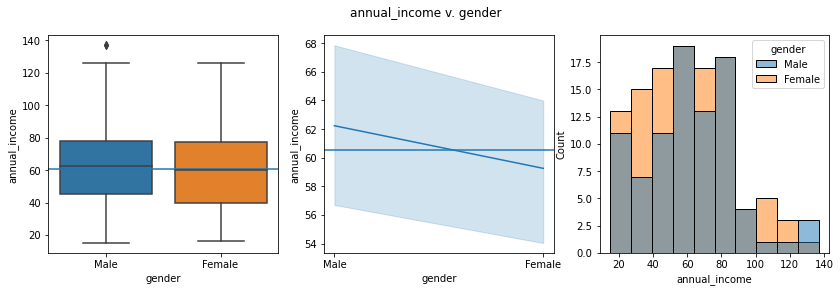

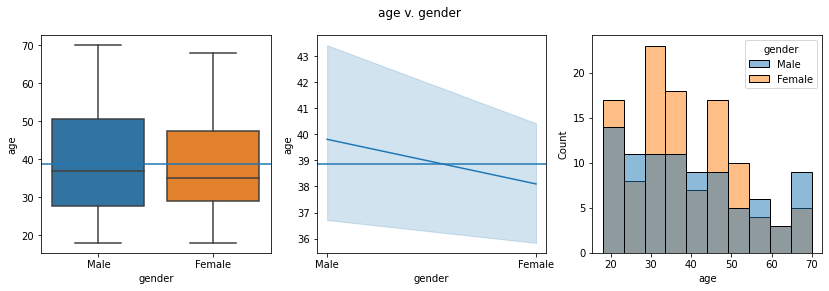

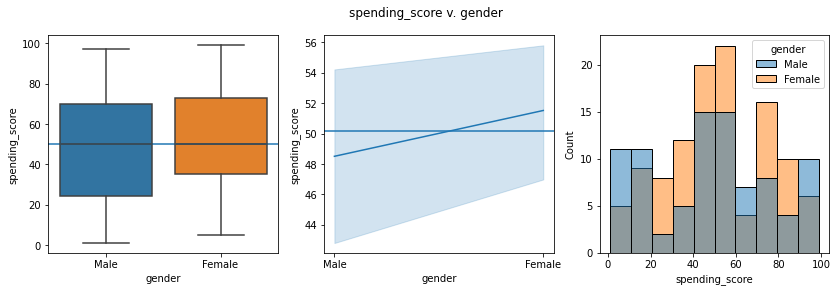

In [25]:
plot_categorical_and_continuous_vars(df,cat_cols, con_cols)